In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

db = pd.read_csv("Natural_Environment_Conditions_2010.csv", sep=",")

avg_num_trees = db["# Street Trees"].mean()
avg_num_parkSpace = db["Park Space (acres/1000 pers.)"].mean()


mask = (db["# Street Trees"] > avg_num_trees  ) & (db["Park Space (acres/1000 pers.)"] > avg_num_parkSpace - 20 )
maskedDB = db[mask] 

top30_env = maskedDB[["Neighborhood", "# Street Trees", "Park Space (acres/1000 pers.)" ]].sort_values("# Street Trees", ascending = False)
top30_env

,Neighborhood,# Street Trees,Park Space (acres/1000 pers.)
76,Squirrel Hill South,2263,45.306618
75,Squirrel Hill North,1846,2.309601
67,Shadyside,1601,1.225656
71,South Side Flats,1337,3.178111
62,Point Breeze,1092,10.307432
9,Bloomfield,1035,0.562544
39,Highland Park,1012,54.844722
13,Brookline,813,4.604359
78,Stanton Heights,730,3.027385
12,Brighton Heights,729,4.587415


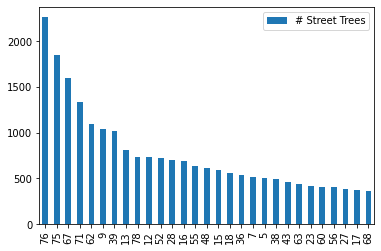

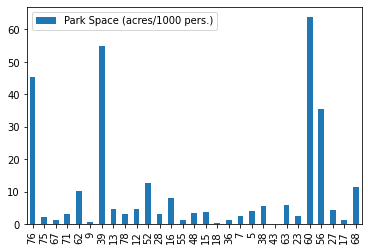

In [2]:
trees = top30_env[["Neighborhood", "# Street Trees"]]
park = top30_env[["Neighborhood", "Park Space (acres/1000 pers.)"]]
trees.plot.bar()
park.plot.bar()

In [3]:
pub = pd.read_csv("Public_safety.csv", sep=",")


pub["Combined Crime Score"] = pub["Part 1 Crime per 100 Persons (2010)"]*2 + pub["Part 2 Crime per 100 Persons (2010)"]

top30_pub = pub[["Neighborhood" , "Part 1 Crime per 100 Persons (2010)","Part 2 Crime per 100 Persons (2010)", "Combined Crime Score" ]].sort_values("Combined Crime Score", ascending = True).head(30)
top30_pub

,Neighborhood,Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),Combined Crime Score
31,Fairywood,0.299401,0.598802,1.197605
54,New Homestead,0.707071,0.404040,1.818182
75,Squirrel Hill North,1.302473,0.968054,3.573000
45,Lincoln Place,0.991633,1.952278,3.935544
58,Oakwood,1.363194,1.363194,4.089581
80,Summer Hill,1.236917,2.093245,4.567079
55,North Oakland,1.724955,1.288977,4.738887
78,Stanton Heights,1.456205,1.912628,4.825038
5,Banksville,1.496139,1.954633,4.946911
26,East Carnegie,1.578947,1.929825,5.087719


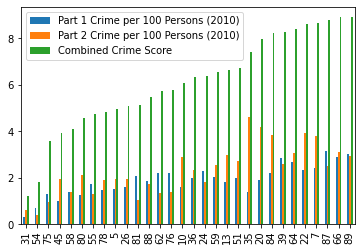

In [4]:
top30_pub.plot.bar()

In [7]:
# Education-Income
chip = pd.read_csv("education-income.csv")
#chip.head(10)

In [8]:
# Rename columns
chip.columns = chip.columns.str.replace("'"," ")
chip['Edu. Attainment: Bachelor s Degree (2010)'] = chip['Edu. Attainment: Bachelor s Degree (2010)'].str.replace('%', '')
chip["Edu. Attainment: Postgraduate Degree (2010)"] = chip['Edu. Attainment: Postgraduate Degree (2010)'].str.replace('%', '')
chip['2009 Med. Income ( 13 Dollars)'] = chip['2009 Med. Income ( 13 Dollars)'].str.replace('$','')
chip['2009 Med. Income ( 13 Dollars)'] = chip['2009 Med. Income ( 13 Dollars)'].str.replace(',','')
chip['Est. Percent Under Poverty (2010)'] = chip['Est. Percent Under Poverty (2010)'].str.replace('%','')
chip = chip[['Neighborhood','Edu. Attainment: Bachelor s Degree (2010)','Edu. Attainment: Postgraduate Degree (2010)','2009 Med. Income ( 13 Dollars)','Est. Percent Under Poverty (2010)']]
#chip.head(10)

<ipython-input-8-e481984b9195>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chip['2009 Med. Income ( 13 Dollars)'] = chip['2009 Med. Income ( 13 Dollars)'].str.replace('$','')


In [9]:
# Combine Bachelor's and Post Graduate Degree for a total of 30 rows
sum_edu= chip['Edu. Attainment: Postgraduate Degree (2010)'].astype(float) + chip['Edu. Attainment: Bachelor s Degree (2010)'].astype(float)
sorted_sum = sum_edu.sort_values(ascending = False)
sort = pd.DataFrame(sorted_sum)
count = 0
d = list()
for index,row in sort.iterrows():
    if count < 30:
        d.append(chip.iloc[index])
        count+=1
    else: break
sorted_edu = pd.DataFrame(d)
#sorted_edu

In [10]:
# sorted by most income and least poverty separately
chip['2009 Med. Income ( 13 Dollars)'] = chip['2009 Med. Income ( 13 Dollars)'].astype(int)
sorted_income = chip.sort_values(by = '2009 Med. Income ( 13 Dollars)',ascending = False)
#sorted_income.head(10)
chip['Est. Percent Under Poverty (2010)'] = chip['Est. Percent Under Poverty (2010)'].astype(float)
sorted_poverty = chip.sort_values(by = 'Est. Percent Under Poverty (2010)')
#sorted_poverty.head(10)

In [11]:
# took top 30 for income, poverty
top30_income = sorted_income.head(30)
bot30_poverty = sorted_poverty.head(30)
bot30_poverty = bot30_poverty[['Neighborhood']]
top30_income = top30_income[['Neighborhood']]
#bot30_poverty

In [12]:
# found common neighborhoods with most income, highest education, and least poverty
top_eduIncome = sorted_edu.merge(bot30_poverty, on='Neighborhood').merge(top30_income, on="Neighborhood")
top_eduIncome

,Neighborhood,Edu. Attainment: Bachelor s Degree (2010),Edu. Attainment: Postgraduate Degree (2010),2009 Med. Income ( 13 Dollars),Est. Percent Under Poverty (2010)
0,Squirrel Hill North,26.70,40.10,91409,8.80
1,Regent Square,21.00,44.00,84635,1.10
2,Squirrel Hill South,27.40,32.00,59376,11.70
3,Point Breeze,25.90,32.50,95704,4.60
4,Highland Park,23.90,31.80,66985,9.20
5,Allegheny West,44.80,10.50,45519,5.00
6,Strip District,33.40,18.50,70706,2.10
7,South Shore,0.00,47.60,163773,0.00
8,Greenfield,22.30,17.30,47502,9.20
9,Swisshelm Park,26.20,11.80,79025,2.10


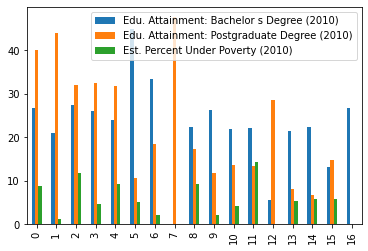

In [13]:
top_edu = top_eduIncome[['Edu. Attainment: Bachelor s Degree (2010)',	'Edu. Attainment: Postgraduate Degree (2010)','Est. Percent Under Poverty (2010)']]
top_edu.astype(float).plot.bar()

In [14]:
# top common neighborhoods in all three subcategories
top = top_eduIncome.merge(top30_pub, on = "Neighborhood").merge(top30_env, on = "Neighborhood")
top

,Neighborhood,Edu. Attainment: Bachelor s Degree (2010),Edu. Attainment: Postgraduate Degree (2010),2009 Med. Income ( 13 Dollars),Est. Percent Under Poverty (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),Combined Crime Score,# Street Trees,Park Space (acres/1000 pers.)
0,Squirrel Hill North,26.70,40.10,91409,8.80,1.302473,0.968054,3.573000,1846,2.309601
1,Squirrel Hill South,27.40,32.00,59376,11.70,2.190602,1.389808,5.771013,2263,45.306618
2,Point Breeze,25.90,32.50,95704,4.60,2.182502,1.354657,5.719661,1092,10.307432
3,Highland Park,23.90,31.80,66985,9.20,2.845973,2.580141,8.272088,1012,54.844722
4,Greenfield,22.30,17.30,47502,9.20,1.987935,2.330683,6.306553,540,1.315191
5,Stanton Heights,21.90,13.50,53354,4.20,1.456205,1.912628,4.825038,730,3.027385
6,Banksville,22.30,6.60,55181,5.80,1.496139,1.954633,4.946911,506,4.115347


<ipython-input-49-66bbbe31e7f7>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  comb = colList.sum(axis=1)
<ipython-input-49-66bbbe31e7f7>:19: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax.pie(x, labels=labels, autopct='%1.1f%%', radius=3, center=(4, 4),


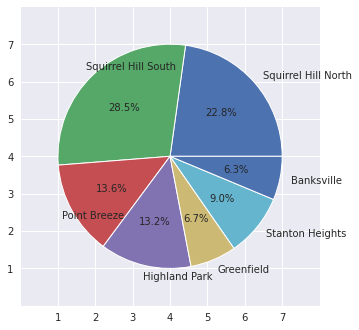

In [49]:
list_of_my_columns = top[['Edu. Attainment: Bachelor s Degree (2010)', 'Edu. Attainment: Postgraduate Degree (2010)', '2009 Med. Income ( 13 Dollars)','# Street Trees','Park Space (acres/1000 pers.)']]

colList = pd.DataFrame(list_of_my_columns)
comb = colList.sum(axis=1)
cb = pd.DataFrame(comb)
count = 0
x = list()
for index,row in cb.iterrows():
    if count < 7:
        x.append(row)
        count+=1
    else: break

# make data
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
labels = 'Squirrel Hill North','Squirrel Hill South','Point Breeze','Highland Park','Greenfield','Stanton Heights','Banksville'
# plot
fig, ax = plt.subplots()
ax.pie(x, labels=labels, autopct='%1.1f%%', radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()